# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Preprocessing](#Preprocessing)
    - [Multicolinearity - VIF](#Multicolinearity---VIF)
- [Analysis](#Analysis)
- [Heatmaps of Best Pitches](#Heatmaps-of-Best-Pitches)
    - [4-Seam](#4-Seam)
    - [Cutter](#Cutter)
    - [Slider](#Slider)
    - [Curveball](#Curveball)
    - [Changeup](#Changeup)

# Imports

In [1]:
from matplotlib.patches import Rectangle
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('../data/model-pitches-rv.csv', index_col = [0])
data.drop(columns = ['plate_x', 'release_pos_x'], inplace = True)
data.rename(columns = {'pfx_-x': 'pfx_x', 
                       'plate_-x': 'plate_x', 
                       'release_pos_-x': 'release_pos_x'}, 
            inplace = True)

xrv = pd.read_csv('../data/xrv-pitches.csv', index_col = [0])
rv_pitches = pd.read_csv('../data/pitches-rv-table.csv', index_col = [0])
grouped_pitches_rv = pd.read_csv('../data/grouped-pitches-rv-table.csv', index_col = [0])

pd.set_option('max_columns', None)
print(data.shape)
data.head()

(705396, 70)


,player_name,p_throws,pitch_type,velo,spin_rate,spin_axis,pfx_x,pfx_z,bauer_units,effective_speed,release_pos_x,release_pos_z,release_extension,release_pos_y,plate_x,plate_z,type,balls,strikes,pitch_count,delta_run_exp,stand,bb_type,description,events,hit_distance_sc,exit_velo,launch_angle,launch_speed_angle,woba_value,woba_denom,xba,xwoba,babip_value,iso_value,at_bat_number,pitch_number,inning,inning_topbot,home_score,away_score,post_home_score,post_away_score,on_1b,on_2b,on_3b,outs_when_up,is_strike,is_ball,final_pitch_ab,out_to_end_inning,home_runs,away_runs,runs,re,re_change,re_end_state,re24,lin_weight_above_avg,lin_weight_above_outs,woba_scale,lin_weights_above_avg_scale,lin_weights_above_outs_scale,woba,wraa_change,count_re,bs_lin_weight,bs_lin_weight_scale,rv_above_avg,rv
0,"Smith, Will",L,FF,92.3,2330.0,148.0,-8.28,16.56,25.243770,92.8,-1.40,6.80,6.5,54.03,0.69,2.83,X,1,2,1-2,-0.073,R,ground_ball,hit_into_play,field_out,13.0,95.2,-13.0,2.0,0.0,1.0,0.174,0.158,0.0,0.0,61,4,9,0,5,0,5,0,0,0,0,2,1,0,1,1,0,0,0,0.098,-0.098,0.000,-0.098,-0.25,0.0,1.209,-0.302,0.0,0.223,-0.184,-0.282,-0.141,-0.170,-0.472,-0.170
1,"Smith, Will",L,SL,80.6,2254.0,315.0,9.24,5.76,27.965261,81.2,-1.60,6.64,6.4,54.15,0.71,2.62,S,1,1,1-1,-0.027,R,NaN,strike,NaN,108.0,75.3,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,9,0,5,0,5,0,0,0,0,2,1,0,0,0,0,0,0,0.098,0.000,0.098,0.000,NaN,NaN,1.209,0.000,0.0,0.293,-0.058,-0.058,-0.006,-0.007,-0.007,-0.007
2,"Smith, Will",L,CU,75.5,1940.0,328.0,7.80,-6.12,25.695364,75.2,-1.46,6.88,6.2,54.34,0.04,2.46,S,1,0,1-0,-0.020,R,NaN,strike,NaN,157.0,83.5,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,9,0,5,0,5,0,0,0,0,2,1,0,0,0,0,0,0,0.098,0.000,0.098,0.000,NaN,NaN,1.209,0.000,0.0,0.355,-0.051,-0.051,0.001,0.001,0.001,0.001
3,"Smith, Will",L,CU,75.0,2017.0,330.0,8.28,-8.28,26.893333,74.5,-1.53,6.83,5.9,54.61,-2.10,3.89,B,0,0,0-0,0.016,R,NaN,ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,1,9,0,5,0,5,0,0,0,0,2,0,1,0,0,0,0,0,0.098,0.000,0.098,0.000,NaN,NaN,1.209,0.000,0.0,0.314,0.034,0.034,-0.003,-0.004,-0.004,-0.004
4,"Smith, Will",L,FF,91.2,2281.0,143.0,-7.56,15.36,25.010965,90.9,-1.49,6.66,6.3,54.15,0.31,2.80,X,1,0,1-0,-0.189,L,ground_ball,hit_into_play,field_out,9.0,93.3,-18.0,2.0,0.0,1.0,0.100,0.090,0.0,0.0,60,2,9,0,5,0,5,0,0,0,0,1,1,0,1,0,0,0,0,0.254,-0.156,0.098,-0.156,-0.25,0.0,1.209,-0.302,0.0,0.355,-0.051,-0.207,0.001,0.001,-0.301,0.001


# Preprocessing

### Multicolinearity - VIF

**Independent Variables:** Velocity, Spin Rate, VB, HB, Release Extension, Horizontal Release Position, Vertical Release Position, Horizontal Plate Coords, Vertical Plate Coords

**Dependent Variable:** rv

In [3]:
features = data[['player_name', 'p_throws', 'pitch_type', 'velo', 'spin_rate', 
                 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 'release_extension',
                 'plate_x', 'plate_z', 'rv']]

features_vif = features.select_dtypes([np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = features_vif.columns

vif_data["VIF"] = [variance_inflation_factor(features_vif.values, i)
                   for i in range(len(features_vif.columns))]

vif_data.sort_values(by = 'VIF').head(10)

,feature,VIF
9,rv,1.012208
7,plate_x,1.110543
4,release_pos_x,1.454762
2,pfx_x,1.466135
3,pfx_z,3.114446
8,plate_z,7.451706
1,spin_rate,50.839720
5,release_pos_z,103.361778
6,release_extension,152.722320
0,velo,277.759432


# Analysis

### Base-Out-State and Linear Weights for each Ball in Play Event

In [4]:
data.groupby(['events'], as_index = False)['re24', 'lin_weight_above_outs', 
                                           'lin_weights_above_outs_scale', 'rv'].mean()

,events,re24,lin_weight_above_outs,lin_weights_above_outs_scale,rv
0,double,0.765841,1.016,1.228,1.165998
1,field_error,0.427661,0.678,0.820,0.747663
2,field_out,-0.249793,0.000,0.000,-0.103923
3,hit_by_pitch,0.340325,0.590,0.713,0.637008
4,home_run,1.394975,1.645,1.989,1.934701
5,single,0.457643,0.708,0.856,0.788939
6,triple,1.052801,1.303,1.575,1.508801
7,walk,0.313550,0.564,0.682,0.640175


In [5]:
data.groupby(['pitch_count'], as_index = False)['woba', 'wraa_change', 'count_re', 'bs_lin_weight', 
                                                'bs_lin_weight_scale', 'rv'].mean()

,pitch_count,woba,wraa_change,count_re,bs_lin_weight,bs_lin_weight_scale,rv
0,0-0,0.314,-0.012715,-0.003127,-0.003,-0.004,0.038423
1,0-1,0.262,-0.022642,-0.013365,-0.013,-0.016,0.045727
2,0-2,0.196,-0.080462,-0.123197,-0.123,-0.149,-0.087995
3,1-0,0.355,-0.010147,0.001278,0.001,0.001,0.059814
4,1-1,0.293,-0.020787,-0.005869,-0.006,-0.007,0.068386
...,...,...,...,...,...,...,...
7,2-1,0.352,-0.016841,0.000218,0.000,0.000,0.085070
8,2-2,0.273,-0.129371,-0.168415,-0.168,-0.203,-0.114041
9,3-0,0.622,-0.064147,0.053291,0.053,0.064,0.314586
10,3-1,0.470,0.001302,0.115239,0.115,0.139,0.425531


In [6]:
rv_pitches.head()

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
0,"Abbott, Cory",R,FF,207.0,17.376,8.39,14.826,7.16
1,"Abreu, Albert",R,FF,103.0,2.765,2.68,3.719,3.61
2,"Abreu, Bryan",R,FF,310.0,14.225,4.59,11.294,3.64
3,"Acevedo, Domingo",R,FF,88.0,6.004,6.82,5.375,6.11
4,"Adam, Jason",R,FF,125.0,7.373,5.90,5.128,4.10


# Index DataFrame for Pitch Type (min. 100 pitches)

In [7]:
rhp = rv_pitches.loc[rv_pitches['p_throws'] == 'R']
lhp = rv_pitches.loc[rv_pitches['p_throws'] == 'L']
ff = rv_pitches.loc[(rv_pitches['pitch_type'] == 'FF') & (rv_pitches['n_pitches'] > 100)]
fc = rv_pitches.loc[(rv_pitches['pitch_type'] == 'FC') & (rv_pitches['n_pitches'] > 100)]
si = rv_pitches.loc[(rv_pitches['pitch_type'] == 'SI') & (rv_pitches['n_pitches'] > 100)]
sl = rv_pitches.loc[(rv_pitches['pitch_type'] == 'SL') & (rv_pitches['n_pitches'] > 100)]
cu = rv_pitches.loc[(rv_pitches['pitch_type'] == 'CU') & (rv_pitches['n_pitches'] > 100)]
ch = rv_pitches.loc[(rv_pitches['pitch_type'] == 'CH') & (rv_pitches['n_pitches'] > 100)]

## 4-Seam RV/100 Leaders

In [8]:
ff_leaders = ff.sort_values(by = ['xRV/100'])
ff_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
306,"Lorenzen, Michael",R,FF,126.0,-3.173,-2.52,-3.478,-2.76
94,"Cishek, Steve",R,FF,206.0,-11.966,-5.81,-5.184,-2.52
107,"Coonrod, Sam",R,FF,139.0,-5.284,-3.80,-2.618,-1.88
172,"Funkhouser, Kyle",R,FF,259.0,-7.824,-3.02,-4.604,-1.78
580,"Woodruff, Brandon",R,FF,940.0,-8.986,-0.96,-8.101,-0.86
149,"Familia, Jeurys",R,FF,147.0,-4.854,-3.30,-0.835,-0.57
567,"Whitlock, Garrett",R,FF,109.0,-3.496,-3.21,-0.361,-0.33
204,"Green, Chad",R,FF,853.0,0.226,0.03,-2.190,-0.26
39,"Baz, Shane",R,FF,108.0,1.019,0.94,0.131,0.12
663,"Hader, Josh",L,FF,593.0,-9.951,-1.68,2.553,0.43


## Cutter RV/100 Leaders

In [9]:
fc_leaders = fc.sort_values(by = ['xRV/100'])
fc_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
971,"Alvarado, José",L,FC,170.0,-12.348,-7.26,-5.499,-3.23
984,"Enns, Dietrich",L,FC,133.0,-2.456,-1.85,-0.855,-0.64
825,"Chatwood, Tyler",R,FC,214.0,-2.836,-1.33,0.022,0.01
976,"Bleier, Richard",L,FC,158.0,0.408,0.26,0.086,0.05
921,"Rucker, Michael",R,FC,135.0,2.423,1.79,0.554,0.41
1010,"Newcomb, Sean",L,FC,170.0,-3.739,-2.20,0.962,0.57
949,"Voth, Austin",R,FC,139.0,0.276,0.20,1.389,1.00
848,"Garcia, Luis",R,FC,565.0,-3.795,-0.67,6.479,1.15
845,"Fulmer, Carson",R,FC,106.0,0.651,0.61,1.834,1.73
841,"Fedde, Erick",R,FC,554.0,5.767,1.04,9.747,1.76


## Sinker RV/100 Leaders

In [10]:
si_leaders = si.sort_values(by = ['xRV/100'])
si_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
1259,"Nola, Aaron",R,SI,419.0,3.321,0.79,5.195,1.24
1497,"Rodriguez, Eduardo",L,SI,305.0,-4.487,-1.47,3.950,1.30
1070,"Burnes, Corbin",R,SI,236.0,-1.357,-0.58,3.121,1.32
1306,"Sadler, Casey",R,SI,156.0,-3.182,-2.04,2.388,1.53
1521,"Suárez, Ranger",L,SI,734.0,9.030,1.23,13.191,1.80
1108,"DeSclafani, Anthony",R,SI,473.0,2.253,0.48,11.243,2.38
1104,"Darvish, Yu",R,SI,229.0,0.001,0.00,6.085,2.66
1152,"Graveman, Kendall",R,SI,548.0,12.262,2.24,14.920,2.72
1468,"Matz, Steven",L,SI,1327.0,49.708,3.75,38.884,2.93
1469,"Mayza, Tim",L,SI,595.0,10.157,1.71,18.418,3.10


## Slider RV/100 Leaders

In [11]:
sl_leaders = sl.sort_values(by = ['xRV/100'])
sl_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
2072,"Bummer, Aaron",L,SL,281.0,-22.528,-8.02,-15.021,-5.35
1739,"Hendriks, Liam",R,SL,235.0,-15.552,-6.62,-10.134,-4.31
2178,"Rodón, Carlos",L,SL,603.0,-30.609,-5.08,-23.895,-3.96
1798,"Leone, Dominic",R,SL,230.0,-12.261,-5.33,-8.680,-3.77
1653,"Dunn, Justin",R,SL,129.0,-7.317,-5.67,-4.591,-3.56
2204,"Steele, Justin",L,SL,161.0,-4.131,-2.57,-5.090,-3.16
2070,"Brothers, Rex",L,SL,344.0,-12.812,-3.72,-10.100,-2.94
2050,"deGrom, Jacob",R,SL,409.0,-15.952,-3.90,-9.942,-2.43
1894,"Phillips, Evan",R,SL,108.0,-1.969,-1.82,-2.450,-2.27
1913,"Rasmussen, Drew",R,SL,361.0,-13.099,-3.63,-8.169,-2.26


## Curveball RV/100 Leaders

In [12]:
cu_leaders = cu.sort_values(by = ['xRV/100'])
cu_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
2329,"Glasnow, Tyler",R,CU,183.0,-18.993,-10.38,-16.120,-8.81
2357,"Hendriks, Liam",R,CU,107.0,-8.871,-8.29,-8.800,-8.22
2630,"Luetge, Lucas",L,CU,189.0,-19.740,-10.44,-13.925,-7.37
2525,"Trivino, Lou",R,CU,133.0,-7.083,-5.33,-4.793,-3.60
2245,"Bassitt, Chris",R,CU,155.0,-9.240,-5.96,-4.728,-3.05
2264,"Burnes, Corbin",R,CU,473.0,-17.117,-3.62,-13.827,-2.92
2416,"McKenzie, Triston",R,CU,356.0,-15.708,-4.41,-9.624,-2.70
2517,"Thompson, Keegan",R,CU,222.0,-6.206,-2.80,-5.848,-2.63
2551,"Woodruff, Brandon",R,CU,468.0,-14.775,-3.16,-10.901,-2.33
2505,"Staumont, Josh",R,CU,380.0,-11.434,-3.01,-8.082,-2.13


## Changeup RV/100 Leaders

In [13]:
ch_leaders = ch.sort_values(by = ['xRV/100'])
ch_leaders.head(10)

,player_name,p_throws,pitch_type,n_pitches,RV,RV/100,xRV,xRV/100
3052,"Romo, Sergio",R,CH,112.0,-5.061,-4.52,-3.009,-2.69
2934,"Knehr, Reiss",R,CH,116.0,-0.698,-0.60,-2.132,-1.84
3243,"Kikuchi, Yusei",L,CH,269.0,-9.227,-3.43,-2.714,-1.01
3066,"Scherzer, Max",R,CH,421.0,-15.727,-3.74,-3.097,-0.74
3099,"Sulser, Cole",R,CH,355.0,-11.158,-3.14,-2.018,-0.57
2823,"Fedde, Erick",R,CH,245.0,-1.759,-0.72,-1.352,-0.55
2926,"Kelly, Joe",R,CH,115.0,-2.679,-2.33,-0.586,-0.51
2875,"Greinke, Zack",R,CH,569.0,-0.944,-0.17,-2.035,-0.36
2833,"Flexen, Chris",R,CH,431.0,-5.485,-1.27,-1.396,-0.32
2705,"Alzolay, Adbert",R,CH,138.0,-3.222,-2.33,-0.384,-0.28


# Heatmaps of Best Pitches

## 4-Seam

In [14]:
lorenzen = xrv.loc[(xrv['player_name'] == 'Lorenzen, Michael') & (xrv['pitch_type'] == 'FF')]
cishek = xrv.loc[(xrv['player_name'] == 'Cishek, Steve') & (xrv['pitch_type'] == 'FF')]

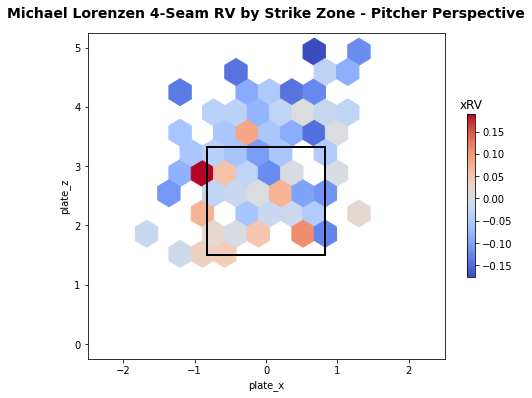

In [15]:
plt.figure(figsize = (8, 6))

plt.hexbin(lorenzen['plate_x'], lorenzen['plate_z'], C = lorenzen['xRV'], cmap = 'coolwarm', gridsize = 10)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.25, 5.25)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Michael Lorenzen 4-Seam RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

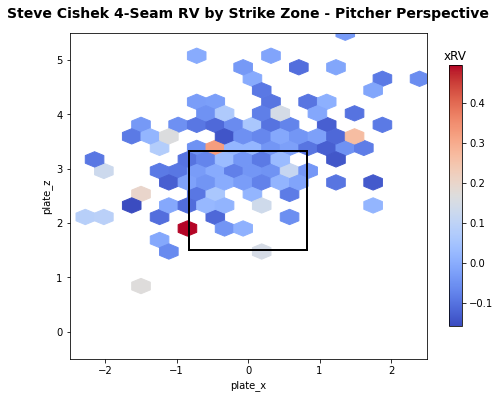

In [16]:
plt.figure(figsize = (8, 6))

plt.hexbin(cishek['plate_x'], cishek['plate_z'], C = cishek['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .8)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Steve Cishek 4-Seam RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

## Cutter

In [17]:
alvarado = xrv.loc[(xrv['player_name'] == 'Alvarado, José') & (xrv['pitch_type'] == 'FC')]

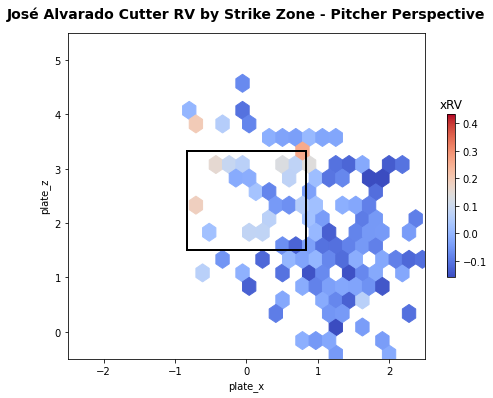

In [18]:
plt.figure(figsize = (8, 6))

plt.hexbin(alvarado['plate_x'], alvarado['plate_z'], C = alvarado['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('José Alvarado Cutter RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

## Slider

In [19]:
hendriks = xrv.loc[(xrv['player_name'] == 'Hendriks, Liam') & (xrv['pitch_type'] == 'SL')]
steele = xrv.loc[(xrv['player_name'] == 'Steele, Justin') & (xrv['pitch_type'] == 'SL')]
deGrom = xrv.loc[(xrv['player_name'] == 'deGrom, Jacob') & (xrv['pitch_type'] == 'SL')]

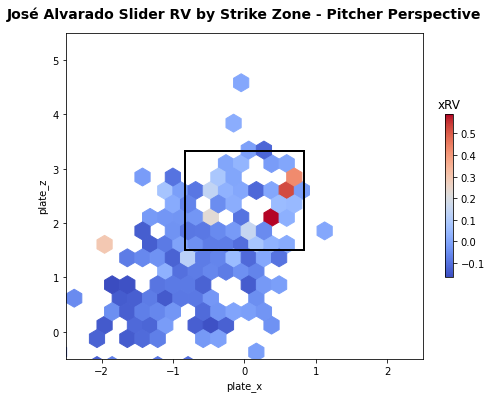

In [20]:
plt.figure(figsize = (8, 6))

plt.hexbin(hendriks['plate_x'], hendriks['plate_z'], C = hendriks['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('José Alvarado Slider RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

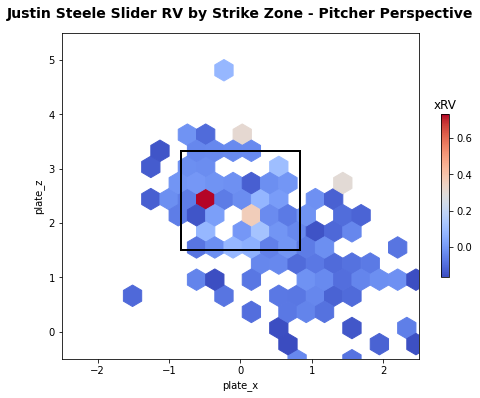

In [21]:
plt.figure(figsize = (8, 6))

plt.hexbin(steele['plate_x'], steele['plate_z'], C = steele['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Justin Steele Slider RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

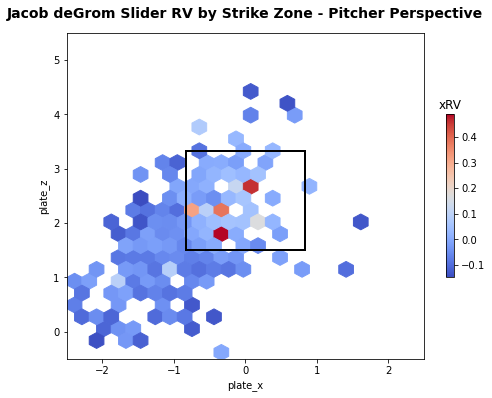

In [22]:
plt.figure(figsize = (8, 6))

plt.hexbin(deGrom['plate_x'], deGrom['plate_z'], C = deGrom['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Jacob deGrom Slider RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

## Curveball

In [23]:
glasnow = xrv.loc[(xrv['player_name'] == 'Glasnow, Tyler') & (xrv['pitch_type'] == 'CU')]
burnes = xrv.loc[(xrv['player_name'] == 'Burnes, Corbin') & (xrv['pitch_type'] == 'CU')]

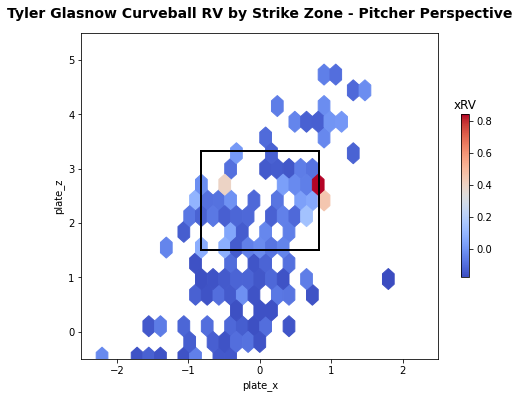

In [24]:
plt.figure(figsize = (8, 6))

plt.hexbin(glasnow['plate_x'], glasnow['plate_z'], C = glasnow['xRV'], cmap = 'coolwarm', gridsize = 25)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Tyler Glasnow Curveball RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

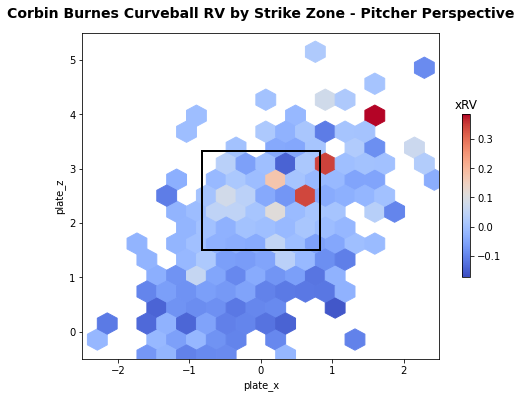

In [25]:
plt.figure(figsize = (8, 6))

plt.hexbin(burnes['plate_x'], burnes['plate_z'], C = burnes['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Corbin Burnes Curveball RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

## Changeup

In [26]:
scherzer = xrv.loc[(xrv['player_name'] == 'Scherzer, Max') & (xrv['pitch_type'] == 'CH')]
greinke = xrv.loc[(xrv['player_name'] == 'Greinke, Zack') & (xrv['pitch_type'] == 'CH')]

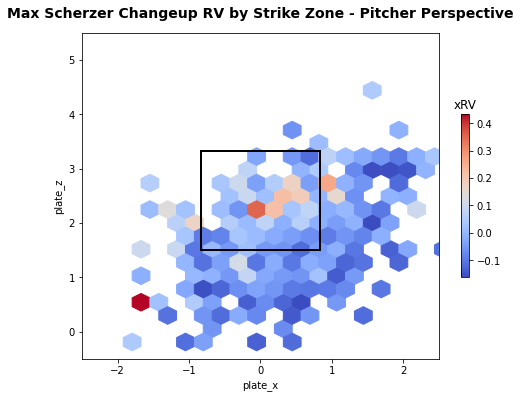

In [27]:
plt.figure(figsize = (8, 6))

plt.hexbin(scherzer['plate_x'], scherzer['plate_z'], C = scherzer['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z') 
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Max Scherzer Changeup RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);

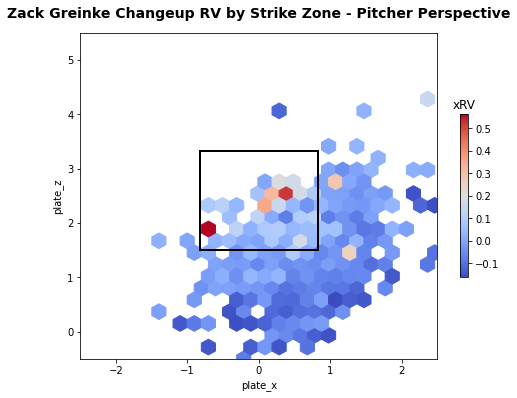

In [28]:
plt.figure(figsize = (8, 6))

plt.hexbin(greinke['plate_x'], greinke['plate_z'], C = greinke['xRV'], cmap = 'coolwarm', gridsize = 20)
plt.xlabel('plate_x'), plt.ylabel('plate_z')
cb = plt.colorbar(shrink = .5)
cb.ax.set_title('xRV')
plt.xlim(-2.5, 2.5), plt.ylim(-.5, 5.5)
plt.gca().add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
plt.title('Zack Greinke Changeup RV by Strike Zone - Pitcher Perspective', fontsize = 14, 
          fontweight = 'bold', pad = 15);